## Bài 3:
* Phân loại ảnh trong dữ liệu cifar10 (https://keras.io/api/datasets/cifar10/...).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras import backend as K

In [2]:
batch_size = 256
num_classes = 10
epochs = 20

In [3]:
# 2. Load dữ liệu
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

### Cách 1: Chuyển về bài toán mnist, ảnh rgb -> gray image

In [5]:
x_train = x_train[:,:,:, 0]*0.299 + x_train[:,:,:, 1]*0.587 + x_train[:,:,:, 2]*0.114
x_test = x_test[:,:,:, 0]*0.299 + x_test[:,:,:, 1]*0.587 + x_test[:,:,:, 2]*0.114

In [6]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32)
(10000, 32, 32)


In [7]:
# 3. Chia lại tập traning, validation
x_val, y_val = x_train[40000:50000, :], y_train[40000:50000]
x_train, y_train = x_train[:40000, :], y_train[:40000]

In [8]:
print(x_train.shape, y_train.shape)

(40000, 32, 32) (40000, 1)


In [9]:
# 4. Reshape lại dữ liệu cho đúng kích thước input của neural network
x_train = x_train.reshape(-1, 1024) # N
x_val = x_val.reshape(-1, 1024)
x_test = x_test.reshape(-1, 1024)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

# normalize (0-1)
x_train /= 255.0
x_val /= 255.0
x_test /= 255.0

print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'val samples')
print(x_test.shape[0], 'test samples')

40000 train samples
10000 val samples
10000 test samples


In [10]:
# 5. One-hot coding
# convert class vectors to binary class matrices
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [11]:
# Định nghĩa model
model = Sequential()
# input_shape
model.add(Dense(512, activation='relu', input_shape=(1024,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 699,690
Trainable params: 699,690
Non-trainable params: 0
__________________________________________________

In [12]:
# Compile model, chỉ rõ hàm loss được sử dụng, phương thức dùng để tối ưu loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam', # adam, .... gradient descent
              metrics=['accuracy'])

In [13]:
print("Learning rate before first fit:", model.optimizer.learning_rate.numpy())

Learning rate before first fit: 0.001


In [14]:
K.set_value(model.optimizer.learning_rate, 0.008)
print("Learning rate before second fit:", model.optimizer.learning_rate.numpy())

Learning rate before second fit: 0.008


In [15]:
# Traning, fit với data
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/20
157/157 [==============================] - 16s 20ms/step - loss: 2.4771 - accuracy: 0.1299 - val_loss: 2.1969 - val_accuracy: 0.1811
Epoch 2/20
157/157 [==============================] - 2s 16ms/step - loss: 2.1108 - accuracy: 0.2127 - val_loss: 2.0189 - val_accuracy: 0.2607
Epoch 3/20
157/157 [==============================] - 2s 16ms/step - loss: 2.0070 - accuracy: 0.2570 - val_loss: 1.9896 - val_accuracy: 0.2738
Epoch 4/20
157/157 [==============================] - 3s 16ms/step - loss: 1.9893 - accuracy: 0.2690 - val_loss: 2.0267 - val_accuracy: 0.2593
Epoch 5/20
157/157 [==============================] - 2s 16ms/step - loss: 1.9663 - accuracy: 0.2802 - val_loss: 1.9381 - val_accuracy: 0.3023
Epoch 6/20
157/157 [==============================] - 2s 16ms/step - loss: 1.9374 - accuracy: 0.2943 - val_loss: 1.9572 - val_accuracy: 0.2941
Epoch 7/20
157/157 [==============================] - 3s 16ms/step - loss: 1.9126 - accuracy: 0.3023 - val_loss: 1.9210 - val_accuracy: 0.305

In [16]:
# H.history['loss'], 'accuracy', 'val_loss', 'val_accuracy'
H.history['val_accuracy']

[0.181099995970726,
 0.260699987411499,
 0.27379998564720154,
 0.25929999351501465,
 0.30230000615119934,
 0.29409998655319214,
 0.3059000074863434,
 0.32739999890327454,
 0.3098999857902527,
 0.3068999946117401,
 0.3269999921321869,
 0.3118000030517578,
 0.32829999923706055,
 0.3287000060081482,
 0.3393999934196472,
 0.3386000096797943,
 0.33880001306533813,
 0.3424000144004822,
 0.33489999175071716,
 0.3458999991416931]

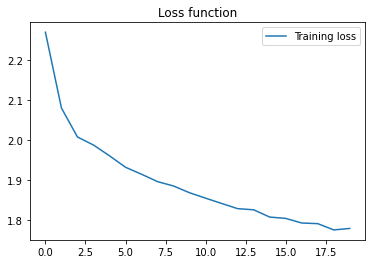

In [17]:
# Vẽ đồ thị loss của tập train
fig = plt.figure()
numOfEpoch = epochs
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='Training loss')
plt.title('Loss function')
plt.xlabel = "Epoch"
plt.ylabel = "Loss"
plt.legend()

In [18]:
# Đánh giá model với dữ liệu test
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.8229591846466064
Test accuracy: 0.3458999991416931


Giá trị thật:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Giá trị dự đoán:  8


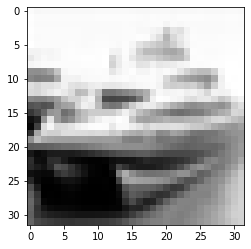

In [19]:
# 10. Dự đoán ảnh
plt.imshow(x_test[1].reshape(32,32), cmap='gray')

print('Giá trị thật: ', y_test[1])
y_predict = model.predict(x_test[1].reshape(-1, 1024))
print('Giá trị dự đoán: ', np.argmax(y_predict))

### Cách 2:

In [20]:
batch_size = 256
num_classes = 10
epochs = 20

In [21]:
# 2. Load dữ liệu
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [22]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [23]:
x_val, y_val = x_train[40000:50000, :], y_train[40000:50000]
x_train, y_train = x_train[:40000, :], y_train[:40000]

In [25]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((40000, 32, 32, 3), (40000, 1), (10000, 32, 32, 3), (10000, 1))

In [26]:
x_train = x_train.reshape(-1, 3072) # N
x_val = x_val.reshape(-1, 3072)
x_test = x_test.reshape(-1, 3072)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

# normalize (0-1)
x_train /= 255.0
x_test /= 255.0
x_val /= 255.0
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'val samples')
print(x_test.shape[0], 'test samples')

40000 train samples
10000 val samples
10000 test samples


In [27]:
# one - hot coding
# convert class vectors to binary class matrices
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [56]:
model = Sequential()
# input_shape
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_13 (Dense)             (None, 32)                16416     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 1,590,122
Trainable params: 1,590,122
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(), # adam, .... gradient descent
              metrics=['accuracy'])

In [58]:
K.set_value(model.optimizer.learning_rate, 0.005)
print("Learning rate before second fit:", model.optimizer.learning_rate.numpy())

Learning rate before second fit: 0.005


In [59]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/20
157/157 [==============================] - 5s 26ms/step - loss: 2.2173 - accuracy: 0.1787 - val_loss: 2.0520 - val_accuracy: 0.2669
Epoch 2/20
157/157 [==============================] - 4s 25ms/step - loss: 2.0161 - accuracy: 0.2827 - val_loss: 1.9577 - val_accuracy: 0.3088
Epoch 3/20
157/157 [==============================] - 4s 25ms/step - loss: 1.9307 - accuracy: 0.3220 - val_loss: 1.9503 - val_accuracy: 0.2905
Epoch 4/20
157/157 [==============================] - 4s 25ms/step - loss: 1.8834 - accuracy: 0.3437 - val_loss: 1.9046 - val_accuracy: 0.3250
Epoch 5/20
157/157 [==============================] - 4s 25ms/step - loss: 1.8465 - accuracy: 0.3556 - val_loss: 1.8610 - val_accuracy: 0.3473
Epoch 6/20
157/157 [==============================] - 4s 25ms/step - loss: 1.8205 - accuracy: 0.3697 - val_loss: 1.8352 - val_accuracy: 0.3528
Epoch 7/20
157/157 [==============================] - 4s 25ms/step - loss: 1.7920 - accuracy: 0.3788 - val_loss: 1.8131 - val_accuracy: 0.3648

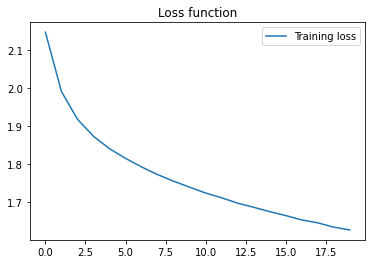

In [62]:
# Vẽ đồ thị loss của tập train
fig = plt.figure()
numOfEpoch = epochs
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='Training loss')
plt.title('Loss function')
plt.xlabel = "Epoch"
plt.ylabel = "Loss"
plt.legend()

In [60]:
# Đánh giá model với dữ liệu test
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.680833339691162
Test accuracy: 0.40790000557899475


Giá trị thật:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Giá trị dự đoán:  9


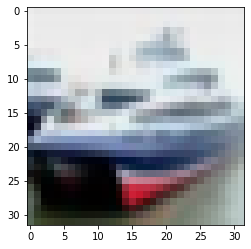

In [61]:
# 10. Dự đoán ảnh
plt.imshow(x_test[1].reshape(32, 32, 3))

print('Giá trị thật: ', y_test[1])
y_predict = model.predict(x_test[1].reshape(-1, 3072))
print('Giá trị dự đoán: ', np.argmax(y_predict))